# EE 123 Lab 1 - Basic Python and DTFT

### General Jupyter Notebook Usage Instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `Shift-Enter`
- To add a new cell, either select `Insert->Insert New Cell Below` or type `b` key after select a cell
- You can change the cell mode from code to text in the pulldown menu or entering `m`. Use `Markdown` for text
- Use `y` to change back to code mode.
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `File->Save and Checkpoint` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell` or type `z` key
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

### Basic Python ###

**If you need a basic refresher on Python and Numpy, you can read and run the python tutorial `python_tutorial.ipynb`.**

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `Insert->Insert New Cell Below` or typing the `b` key after selecting a cell.

Below are a few basic Python usage examples and tips.

* Adding a `?` after a function will open the help/description window for that function.

* The output of the following commands below is `[7 2 3 4 5 6]`. This is because array slicing creates a view instead of an actual copy of the x array that is assigned to y. You can read more about views and copies [here](https://numpy.org/doc/stable/user/basics.copies.html).
```python
    x = np.array([1,2,3,4,5,6]) 
    y = x[0:4]
    y[0] = 7
    print(x)
 ```

* `np` and `plt` are the standard abbreviations for `numpy` and `matplotlib.pyplot` libraries as shown below. Run the cell below to import them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**(Optional)** Generate the same plot as in the following figure inline:
    
<img style="float: left;" src="./tutorial_plot.jpg"> 

If you are having trouble, feel free to look at the **Plotting** section in ```python_tutorial.ipynb```.

In [2]:
x = np.r_[:1:0.01] # if you don't specify a number before the colon, the starting index defaults to 0
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5

# Your code here:



## DTFT Questions

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

In [4]:
N = 5
t = np.r_[-N:N+1]
a = np.ones(N)
np.meshgrid?

Signature:       np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Call signature:  np.meshgrid(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function meshgrid at 0x000001EDCA7E3ED0>
File:            c:\users\pazaj\appdata\local\python\pythoncore-3.14-64\lib\site-packages\numpy\lib\_function_base_impl.py
Docstring:      
Return a tuple of coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.
sparse : bool, optional
    If True the shape of the returned coordinate array for dimension *i*
    is reduced from ``(N1, ..., Ni, ... Nn)`` to
    ``(1, ..., 1, Ni, 1, ..., 1)``. 

### Solution for (a):

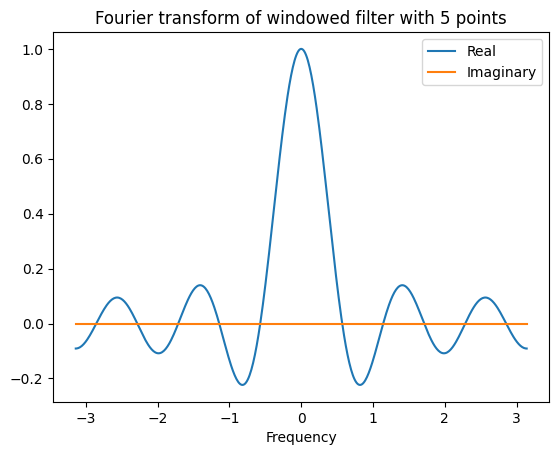

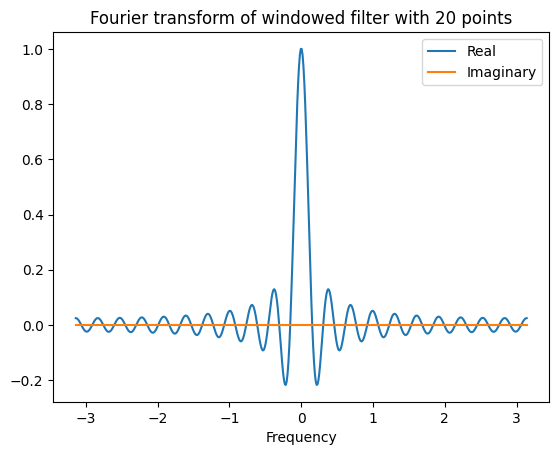

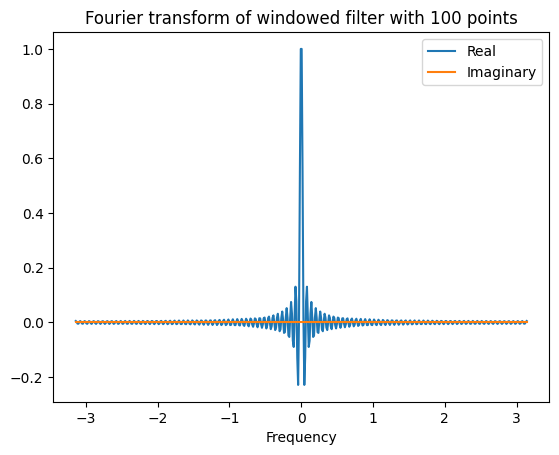

In [7]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = np.r_[-N:N+1]
    # create window function (w) using np.ones
    w = np.ones(len(NN))
    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = np.linspace(-np.pi, np.pi, 512)
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n,omega = np.meshgrid(NN, Omega)

    # create DTFT matrix 
    DTFT = np.exp(-1j * n * omega)

    # evaluate DTFT
    W = np.dot(DTFT, w)

    # normalize W such that W at omega=0 is 1
    W /= W[256]

    # create plots
    # plot both real and imag on the same figure ( use W.real and W.imag )
    plt.figure()
    # Your code here:
    plt.plot(Omega, W.real, label="Real Part")
    plt.plot(Omega, W.imag, label="Imaginary Part")
    # End of your code
    
    plt.xlabel("Frequency")
    plt.title("Fourier transform of windowed filter with "+str(N)+" points")
    plt.legend(("Real","Imaginary"))

Describe the effect of increasing $N$ on the DTFT of the rectangular window.

**Your answer here:**



### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

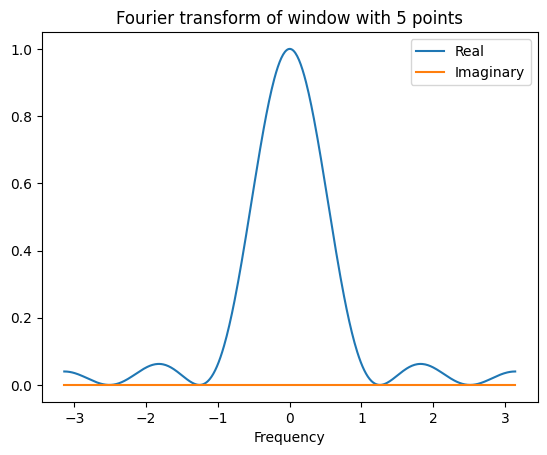

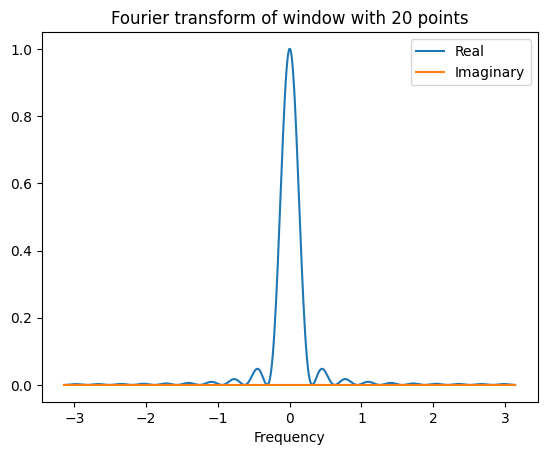

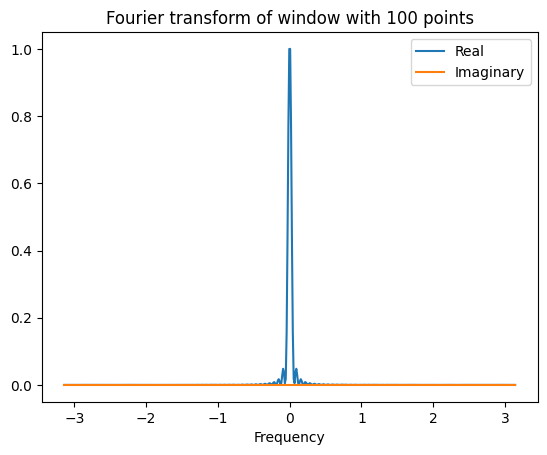

In [8]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = np.r_[-N:N]
    # create window function (w) 
    w = np.ones(len(NN)) * (1 - np.abs(NN)/N)
    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = np.linspace(-np.pi, np.pi, 512)
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n,omega = np.meshgrid(NN, Omega)
    # create DTFT matrix 
    DTFT = np.exp(-1j * n * omega)

    # evaluate DTFT
    W = np.dot(DTFT, w)

    # normalize W such that W at omega=0 is 1
    W /= W[256]
    
    # create plots
    # plot both real and imag on the same figure ( use W.real and W.imag )
    plt.figure()
    # Your code here:
    plt.plot(Omega, W.real, label="Real Part")
    plt.plot(Omega, W.imag, label="Imaginary Part")

    # End of your code

    plt.xlabel("Frequency")
    plt.title("Fourier transform of window with "+str(N)+" points")
    plt.legend(("Real","Imaginary"))

Describe the effect of increasing $N$ on the DTFT of the triangular window.

**Your answer here:**



### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.

### Solution for (c):

In [ ]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = # TODO
    # create window function (w) 
    w = # TODO
    # create windowed low-pass filter (h) 
    h = # TODO
    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = # TODO
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n,omega = # TODO
    # create DTFT matrix 
    DTFT = # TODO

    # evaluate DTFT
    H = # TODO

    # normalize H such that H at omega=0 is 1
    H = # TODO
    # create plots
    # plot both real and imag on the same figure ( use H.real and H.imag )
    plt.figure()
    # Your code here:

    # End of your code
    
    plt.xlabel("Frequency")
    plt.title("Fourier transform of windowed filter with "+str(N)+" points")
    plt.legend(("Real","Imaginary"))

In [ ]:
#repeat for N = 5, 20, 100
for N in [5, 20, 100]:  

    # create 2N+1-point temporal indices (NN) from -N to N using np.r_
    NN = # TODO
    # create window function (w) 
    w = # TODO
    # create windowed low-pass filter (h) 
    h = # TODO
    # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
    Omega = # TODO
    # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
    n,omega = # TODO
    # create DTFT matrix 
    DTFT = # TODO

    # evaluate DTFT
    H = # TODO

    # normalize H such that H at omega=0 is 1
    H = # TODO
    # create plots
    # plot both real and imag on the same figure ( use H.real and H.imag )
    plt.figure()
    # Your code here:

    # End of your code
    
    plt.xlabel("Frequency")
    plt.title("Fourier transform of windowed filter with "+str(N)+" points")
    plt.legend(("Real","Imaginary"))

Explain the difference.

**Your answer here:**

